# Data Cleaning 'Shark  Attacks'
#### This is a short analysis of the shark attacks in the world

### 1. Importing libraries and Data exploration.

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import difflib

In [2]:
df = pd.read_csv('../GSAF5.csv', encoding='latin-1')


# Data Cleaning Steps
 
 -Handle missing values
 
 -Look at information contained in columns (variance)
 
 -Detect outliers
 
 -Convert types
 
 -String Operations
 
 -Treat duplicate
 

In [3]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


In [4]:
df.isnull().sum()/len(df)

Case Number               0.000000
Date                      0.000000
Year                      0.000000
Type                      0.000000
Country                   0.007176
Area                      0.067089
Location                  0.082777
Activity                  0.087951
Name                      0.033378
Sex                       0.094626
Age                       0.447430
Injury                    0.004506
Fatal (Y/N)               0.003171
Time                      0.536215
Species                   0.489653
Investigator or Source    0.002503
pdf                       0.000000
href formula              0.000167
href                      0.000501
Case Number.1             0.000000
Case Number.2             0.000000
original order            0.000000
Unnamed: 22               0.999833
Unnamed: 23               0.999666
dtype: float64

In [5]:
df.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

### Data Preprocessing
Cleaning columns problems like: Redifining the type, typos, null values, etc.

In [6]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
df.drop(columns = ["Time"], inplace = True)

From now on we'll only consider the next columns for our analysis the rest are not consider relevant for this analysis

In [40]:
columns_to_check=['Date','Year','Area', 'Location', 'Type', 'Country','Activity','Sex ', 'Age', 'Injury', 'Fatal',
       'Species ']

In [32]:
columns_to_clean=['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23']

In [33]:
def clean_name(lis):
    clean_names=[]
    for i in lis:
        i=i.lstrip()
        i=i.rstrip()
        clean_names.append(i)
    return list(clean_names)

In [34]:
l=clean_name(columns_to_clean)
print(l)

['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Species', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']


In [35]:
df.columns=l

In [42]:
df=df.rename(columns={'Fatal (Y/N)': 'Fatal'}).copy()

In [43]:
j=clean_name(columns_to_check)

In [44]:
df=df[j]

In [45]:
df

,Date,Year,Area,Location,Type,Country,Activity,Sex,Age,Injury,Fatal,Species
0,18-Sep-16,2016,Florida,"New Smyrna Beach, Volusia County",Unprovoked,USA,Surfing,M,16,Minor injury to thigh,N,NaN
1,18-Sep-16,2016,Florida,"New Smyrna Beach, Volusia County",Unprovoked,USA,Surfing,M,36,Lacerations to hands,N,NaN
2,18-Sep-16,2016,Florida,"New Smyrna Beach, Volusia County",Unprovoked,USA,Surfing,M,43,Lacerations to lower leg,N,NaN
3,17-Sep-16,2016,Victoria,Thirteenth Beach,Unprovoked,AUSTRALIA,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN
4,16-Sep-16,2016,Victoria,Bells Beach,Unprovoked,AUSTRALIA,Surfing,M,NaN,No injury: Knocked off board by shark,N,2 m shark
...,...,...,...,...,...,...,...,...,...,...,...,...
5987,Before 1903,0,Western Australia,Roebuck Bay,Unprovoked,AUSTRALIA,Diving,M,NaN,FATAL,Y,NaN
5988,Before 1903,0,Western Australia,NaN,Unprovoked,AUSTRALIA,Pearl diving,M,NaN,FATAL,Y,NaN
5989,1900-1905,0,North Carolina,Ocracoke Inlet,Unprovoked,USA,Swimming,M,NaN,FATAL,Y,NaN
5990,1883-1889,0,NaN,"Panama Bay 8ºN, 79ºW",Unprovoked,PANAMA,NaN,M,NaN,FATAL,Y,NaN


# Column Year

In [46]:
df[df["Year"].isnull()]


,Date,Year,Area,Location,Type,Country,Activity,Sex,Age,Injury,Fatal,Species


In [47]:
df.loc[187, "Year"] = 2017
df.loc[6079, "Year"] = 1836
df[df["Year"].isnull()] 

,Date,Year,Area,Location,Type,Country,Activity,Sex,Age,Injury,Fatal,Species


In [48]:
df.head()

,Date,Year,Area,Location,Type,Country,Activity,Sex,Age,Injury,Fatal,Species
0,18-Sep-16,2016.0,Florida,"New Smyrna Beach, Volusia County",Unprovoked,USA,Surfing,M,16,Minor injury to thigh,N,NaN
1,18-Sep-16,2016.0,Florida,"New Smyrna Beach, Volusia County",Unprovoked,USA,Surfing,M,36,Lacerations to hands,N,NaN
2,18-Sep-16,2016.0,Florida,"New Smyrna Beach, Volusia County",Unprovoked,USA,Surfing,M,43,Lacerations to lower leg,N,NaN
3,17-Sep-16,2016.0,Victoria,Thirteenth Beach,Unprovoked,AUSTRALIA,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN
4,16-Sep-16,2016.0,Victoria,Bells Beach,Unprovoked,AUSTRALIA,Surfing,M,NaN,No injury: Knocked off board by shark,N,2 m shark


In [49]:
def fill_na(data, indexes, value, col_name):
    for i in indexes:   
        data.at[ i, col_name] = value
        
        
def fill_val(data, indexes, values, col_name):
    j = 0
    for i in indexes:   
        data.at[ i, col_name] = values[j]
        j = j+1

In [50]:
rows_missing = list(df[df["Species"].isna()].index)

In [51]:
df["Species"]=df["Species"].fillna("Unknown")

## Column Fatal 
We need to change this too 

In [52]:
df["Fatal"].value_counts()

N          4315
Y          1552
UNKNOWN      94
 N            8
F             1
N             1
#VALUE!       1
n             1
Name: Fatal, dtype: int64

In [53]:
rows_missing = list(df[df["Fatal"].isna()].index)
df.loc[rows_missing,["Sex","Age","Injury","Fatal"]].head(35)

,Sex,Age,Injury,Fatal
54,M,NaN,"No injury, but sharks repeatedly hit their fin...",NaN
1844,M,27,Reported as shark attack but probable drowning,NaN
2449,M,35,FATAL,NaN
3280,M,21,"Diver shot the shark, then it injured his arm ...",NaN
3435,M,24,"Disappeared, probable drowning but sharks in a...",NaN
3901,NaN,NaN,Boat damaged,NaN
4107,M,NaN,No injury to occupants. Shark tore nets & traw...,NaN
4112,NaN,NaN,Human remains found in shark,NaN
5307,M,20,"Disappeared, but shark involvement unconfirmed",NaN
5437,NaN,NaN,"No injury, no attack",NaN


As we can see, in some cases the column "Injury" contains the information about how fatal the attack was. 
Therefore, we need to extract that information and fill it in the "Fatal" columns whenever is possible.


In [54]:
df[df["Injury"].str.contains("Fatal|Mortal|Letal|letal|fatal|mortal|Death|death|drowing", na=False)].head(20)

,Date,Year,Area,Location,Type,Country,Activity,Sex,Age,Injury,Fatal,Species
217,29-Mar-15,2015.0,Sardinia,NaN,Invalid,ITALY,Diving,M,43,"FATAL, but shark involvement prior to death un...",Y,Shark involvement not cofirmed
303,Aug-14,2014.0,NaN,NaN,Invalid,NaN,Sea disaster,M,NaN,Shark involvement prior to death not confirmed,Y,Shark involvement not confirmed
545,07-Jul-12,2012.0,Victoria,Ship's Graveyard off Point Lonsdale,Invalid,AUSTRALIA,Scuba diving,F,42,Cause of death was drowning & preceded shark i...,Y,Unknown
667,31-Jul-11,2011.0,Pernambuco,Praia do Pina,Invalid,BRAZIL,Swimming,M,14,Cause of death may have been drowning; remains...,Y,Shark involvement prior to death not confirmed
744,27-Nov-10,2010.0,Western Australia,Native Dog Beach,Invalid,AUSTRALIA,Swimming,M,NaN,Death may have been due to drowning,Y,Shark involvement not confirmed
771,29-Aug-10,2010.0,Exuma Islands,"Off Jaws Beach, New Providence Island",Invalid,BAHAMAS,Swimming after boat became disabled,M,43,His partial remains were recovered from a 12' ...,Y,Unknown
867,13-Sep-09,2009.0,Pernambuco,"Piedade, Recife",Provoked,BRAZIL,NaN,M,34,Cause of death was drowning; his remains were ...,Y,Unknown
870,02-Sep-09,2009.0,NaN,Castle Beach,Invalid,NEVIS,Swimming,M,NaN,Death was due to drowning. Two days later his ...,Y,Unknown
989,30-Aug-08,2008.0,Hawaii,"McKenzie Beach Park in Pahoa, Hawai'i",Invalid,USA,Swimming,M,27,Death was probably due to drowning,Y,Shark involvement not confirmed
1102,22-Sep-07,2007.0,Florida,Jupiter Inlet,Invalid,USA,Scuba diving,F,NaN,Shark involvement prior to death unconfirmed,Y,Unknown


As we can see from the previous table we also get rows with non Null values in the column Fatal, so we need to improve our filter as follows:

In [55]:
Fatal_missing = list(df[df["Injury"].str.contains("Fatal|Mortal|Letal|letal|fatal|mortal|Death|death|drowing",
                                                  na=False) & (df["Fatal"].isna())].index)

In [56]:
df[df["Injury"].str.contains("Fatal|Mortal|Letal|letal|fatal|mortal|Death|death|drowing",
                                                  na=False) & (df["Fatal"].isna())]

,Date,Year,Area,Location,Type,Country,Activity,Sex,Age,Injury,Fatal,Species
5747,28-Jul-52,1852.0,NaN,NaN,Invalid,ATLANTIC OCEAN,NaN,F,1,Death preceded shark involvement,NaN,Unknown


In [57]:
fill_na(df, Fatal_missing, "Y","Fatal")

In [58]:
df["Fatal"].isnull().value_counts()

False    5974
True       19
Name: Fatal, dtype: int64

In [59]:
df[df["Injury"].str.contains("Fatal|fatal|not|confirmed",
                                                  na=False) & (df["Fatal"].isna())]

,Date,Year,Area,Location,Type,Country,Activity,Sex,Age,Injury,Fatal,Species
5307,17-Jul-01,1901.0,Syracuse,Capo Santa Croce,Invalid,ITALY,Swimming,M,20,"Disappeared, but shark involvement unconfirmed",NaN,Unknown


In [60]:
lista=df[df["Injury"].str.contains("Fatal|fatal|not|confirmed",
                                                  na=False) & (df["Fatal"].isna())].index

In [61]:
fill_val(df, lista, "Y","Fatal")

In [63]:
df[df["Injury"].str.contains("\d|Fatal",na=False) & (df["Fatal"].isna())]

,Date,Year,Area,Location,Type,Country,Activity,Sex,Age,Injury,Fatal,Species
5468,Reported 29-Nov-1889,1889.0,Northern Peloponnese,Patras,Invalid,GREECE,NaN,NaN,NaN,"Human remains found in 4m, 900 kg shark",NaN,Unknown


In [64]:
df.loc[df["Injury"].str.contains("caught|Fatal|body|contain|contained|Drowned|recovered|Recovered|drowned|Drown|Remains|remains|humans|Human",
                                 na=False) & (df["Fatal"].isna()), 'Injury']

4112                         Human remains found in shark
5468              Human remains found in 4m, 900 kg shark
5793                 Shark caught contained human remains
5794                Shark caught, contained human remains
5849    Partial hominid remains recovered from shark, ...
Name: Injury, dtype: object

In [65]:
more_deaths=list(df.loc[df["Injury"].str.contains("caught|drowning|Disappeared |Fatal|body|contain|contained|Drowned|recovered|Recovered|drowned|Drown|Remains|remains|humans|Human",
                                 na=False) & (df["Fatal"].isna()), 'Injury'].index)

In [66]:
fill_na(df, more_deaths, 'Y',"Fatal")

In [67]:
df.loc[df["Injury"].str.contains("caught|drowning|Disappeared |Fatal|body|contain|contained|Drowned|recovered|Recovered|drowned|Drown|Remains|remains|humans|Human",
                                 na=False) & (df["Fatal"].isna()), 'Injury']

Series([], Name: Injury, dtype: object)

In [70]:
df.loc[df["Fatal"] == " N", "Fatal"] = "N"
df.loc[df["Fatal"] == "N ", "Fatal"] = "N"
df.loc[df["Fatal"] == "n", "Fatal"] = "N"
df.loc[df["Fatal"] == "F", "Fatal"] = "Y"
df.loc[df["Fatal"] == "--M524--M3133Y", "Fatal"] = "UNKNOWN"

## Columm Year

We need to change the type to integer

In [71]:
df['Year'] = df['Year'].astype('Int64')

In [72]:
df[df["Year"].isnull()]

,Date,Year,Area,Location,Type,Country,Activity,Sex,Age,Injury,Fatal,Species


(1.0, 2700.0)

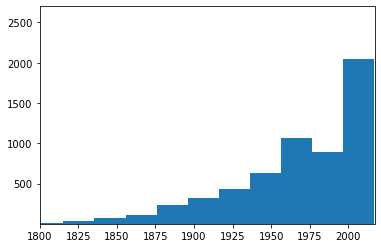

In [73]:
plt.hist(x="Year", data=df, bins=100)
plt.xlim([1800, df["Year"].max()])
plt.ylim([1,2700])

# Column Area

In [74]:
df['Area'].isnull().value_counts()

False    5590
True      403
Name: Area, dtype: int64

# Column Country

In [75]:
df = df.replace("COLUMBIA", "COLOMBIA")
df = df.replace("Isla provedencia", "Isla Providencia")
df["Country"] = df["Country"].fillna("UNKNOWN")
df["Country"] = df["Country"].str.rstrip()
df["Country"] = df["Country"].str.lstrip()
df["Country"] = df["Country"].str.replace("USA","United States")
df["Country"] = df["Country"].str.replace("ST. MAARTIN","SAINT MARTIN")
df["Country"] = df["Country"].str.replace("ST. MARTIN","SAINT MARTIN")
df["Country"] = df["Country"].str.replace("UNITED ARAB EMIRATES \(UAE\)","United Arab Emirates")
df["Country"] = df["Country"].str.replace("ENGLAND","United Kingdom")
df["Country"] = df["Country"].str.replace("SCOTLAND","United Kingdom")
df["Country"] = df["Country"].str.replace("(.*)\?","UNKNOWN")
df["Country"] = df["Country"].str.title()
df["Country"] = df["Country"].str.replace("Trinidad & Tobago","Trinidad and Tobago")
df["Country"] = df["Country"].str.replace("^(New Guinea)","Papua New Guinea")
df["Country"] = df["Country"].str.replace("New Britain","Papua New Guinea")

In [76]:
df[(df.Country.isna()) & (df.Area.isna()== False) & (df.Location.isna()==False)][["Country", "Area", "Location"]]

,Country,Area,Location


In [77]:
df[df["Country"]=='Unknown'][["Country", "Area", "Location"]]

,Country,Area,Location
303,Unknown,NaN,NaN
2731,Unknown,English Channel,NaN
3153,Unknown,NaN,NaN
3162,Unknown,Caribbean Sea,Between St. Kitts & Nevis
3163,Unknown,NaN,NaN
3170,Unknown,NaN,NaN
3174,Unknown,NaN,NaN
3200,Unknown,NaN,NaN
3379,Unknown,NaN,Florida Strait
3435,Unknown,NaN,NaN


# Column Activity

In [78]:
df["Activity"].fillna("UNKNOWN")

def new_activity(a):
    if isinstance(a, str):
        a = a.lower()
        if 'surfing' in a:
            return "Surfing"
        elif 'swimming' in a:
            return "Swimming"
        elif 'fishing' in a:
            return "Fishing"
        elif 'bathing' in a:
            return "Bathing"
        elif 'wading' in a:
            return "Wading"
        elif 'diving' in a:
            return "Diving"
        else:
            return "Other"
    else:
        return "Other"

In [79]:
df["Activity"] = df["Activity"].apply(lambda x: new_activity(x))

# Column Age

In [81]:
df[df.Age.isna()== False].Age.unique()

array(['16', '36', '43', '60s', '51', '50', '12', '9', '22', '25', '37',
       '20', '49', '15', '21', '40', '72', '18', '29', '31', '11', '10',
       '59', '42', '34', '35', '19', '6', '27', '64', '60', '23', '52',
       '13', '57', '48', '39', '24', '26', '69', '46', 'Teen', '41', '45',
       '65', '38', '71', '32', '58', '28', '54', '44', '14', '7', '62',
       '40s', '68', '47', '17', '30', '63', '70', '18 months', '53',
       '20s', '33', '30s', '50s', '8', '61', '55', 'teen', '66', '77',
       '74', '3', '56', '28 & 26', '5', '86', '18 or 20', '12 or 13',
       '46 & 34', '28, 23 & 30', 'Teens', '36 & 26', '8 or 10', '84',
       '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75', '33 or 37',
       'mid-30s', '73', '23 & 20', '7      &    31', '20?', "60's",
       '32 & 30', '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33',
       '21 or 26', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
       '9 months', '25 to 35', '23 & 26', '1', '(adult)', '33 & 37',
       '25

In [84]:
import math
import re
def new_ages(word): 
    
    if  re.findall(r"adult", str(word)):
        return 35
    elif re.findall(r"teen", str(word).lower()):
        return 15
    elif re.findall(r"young", str(word)):
        return 25
    elif re.findall(r"middle-age", str(word)):
        return 45
    elif re.findall(r"Elderly", str(word)):
        return 75
    elif re.findall(r"mid", str(word)):
        return int(re.findall(r"\d{1,2}", str(word))[0])
    elif re.findall(r"month", str(word)):
        return math.floor(int(re.findall(r"\d{1,2}", str(word))[0])/12)
    elif re.findall(r"or|&|to|½", str(word)):
        return int(re.findall(r"\d{1,2}", str(word))[0])
    elif re.findall(r"s", str(word)):
        return int(re.findall(r"\d{1,2}", str(word))[0])+5
    else:
        return pd.to_numeric(word, errors = "coerce")
    

In [85]:
df["Age"] = df["Age"].apply(new_ages)

# Dropping unnecesary rows

In [86]:
def null_cols(data):
    
    nulls = data.isna().sum()
    return nulls[nulls > 0] / len(data) 

In [87]:
null_cols(df)

Date        0.000167
Area        0.067245
Location    0.082930
Type        0.000167
Sex         0.094777
Age         0.449858
Injury      0.004672
Fatal       0.001502
dtype: float64

In [88]:
df[(df.Injury.isna()) &(df.Area.isna())& (df.Location.isna()) &
  (df.Type.isna()) & (df.Sex.isna()) & (df.Age.isna()) &
  (df.Injury.isna())& (df.Fatal.isna())]

,Date,Year,Area,Location,Type,Country,Activity,Sex,Age,Injury,Fatal,Species
6079,NaN,1836,NaN,NaN,NaN,Unknown,Other,NaN,NaN,NaN,NaN,Unknown


In [89]:
to_drop = list(df[(df.Injury.isna()) &(df.Area.isna())& (df.Location.isna()) &
  (df.Type.isna()) & (df.Sex.isna()) & (df.Age.isna()) &
  (df.Injury.isna())& (df.Fatal.isna())].index)

In [90]:
df = df.drop(to_drop)

In [91]:
null_cols(df)

Area        0.067089
Location    0.082777
Sex         0.094626
Age         0.449766
Injury      0.004506
Fatal       0.001335
dtype: float64

In [92]:
df

,Date,Year,Area,Location,Type,Country,Activity,Sex,Age,Injury,Fatal,Species
0,18-Sep-16,2016,Florida,"New Smyrna Beach, Volusia County",Unprovoked,United States,Surfing,M,16.0,Minor injury to thigh,N,Unknown
1,18-Sep-16,2016,Florida,"New Smyrna Beach, Volusia County",Unprovoked,United States,Surfing,M,36.0,Lacerations to hands,N,Unknown
2,18-Sep-16,2016,Florida,"New Smyrna Beach, Volusia County",Unprovoked,United States,Surfing,M,43.0,Lacerations to lower leg,N,Unknown
3,17-Sep-16,2016,Victoria,Thirteenth Beach,Unprovoked,Australia,Surfing,M,NaN,Struck by fin on chest & leg,N,Unknown
4,16-Sep-16,2016,Victoria,Bells Beach,Unprovoked,Australia,Surfing,M,NaN,No injury: Knocked off board by shark,N,2 m shark
...,...,...,...,...,...,...,...,...,...,...,...,...
5987,Before 1903,0,Western Australia,Roebuck Bay,Unprovoked,Australia,Diving,M,NaN,FATAL,Y,Unknown
5988,Before 1903,0,Western Australia,NaN,Unprovoked,Australia,Diving,M,NaN,FATAL,Y,Unknown
5989,1900-1905,0,North Carolina,Ocracoke Inlet,Unprovoked,United States,Swimming,M,NaN,FATAL,Y,Unknown
5990,1883-1889,0,NaN,"Panama Bay 8ºN, 79ºW",Unprovoked,Panama,Other,M,NaN,FATAL,Y,Unknown


# Column Date

In [93]:
import dateparser
date = df["Date"].astype("str")
date = date.str.replace("[rR]eport.*d", "")
date = date.str.replace("\.b", "")
date = date.str.replace("\.R", "")
date = date.str.replace("\.", "-")
date = date.str.replace("190Feb", "19-Feb")
date = date.str.replace("Late ", "")
date = date.str.replace("Early ", "-")
date = date.str.replace("Mid.", "15-")
date = date.str.replace("-Ap-", "-Apr-")
date = date.str.replace("-Jut-", "-Jul-")
date = date.str.replace("23-Decp1896", "23-Dec-1896")
date = date.str.replace("Ca.", "")
date = date.str.lstrip()
date = date.str.rstrip()

In [101]:
df["Formated Date"] = date.apply(lambda x: dateparser.parse(x) if len(x) > 7 else np.datetime64('NaT'))

###  Exporting dataframe as csv file

In [116]:
df.to_csv("../Shark_attacks_clean.csv", index= False)

## Some inferences from the Data

In [102]:
# Function to get the hemisphere of a country
def get_hemisphere(country):
    southern_hemisphere = [
    "South Africa", "Reunion", "Mozambique", "Tanzania", "Mauritius", "Seychelles", 
    "Madagascar", "Namibia", "Mayotte", "Gabon", "Indonesia", "Brazil", "Ecuador", 
    "Argentina", "Chile", "Paraguay", "Uruguay", "Australia", "Papua New Guinea",
    "Fiji", "Papua New Guinea", "British New Guinea", "South Atlantic Ocean", "Indian Ocean", 
    "South Pacific Ocean", "Tasman Sea","Solomon Islands / Vanuatu"]
    if country in southern_hemisphere:
        return "S"
    if country == "Unknown":
        return np.nan
    else:
        return "N"

# Applying the function to create a new column "hemisphere"
df["Hemisphere"] = df["Country"].apply(lambda x: get_hemisphere(x))

In [111]:
df["Month"] = df["Formated Date"].dt.month
#df["Year"] = df["Date"].dt.year

[Text(0, 0.5, ''), Text(0.5, 0, 'Year')]

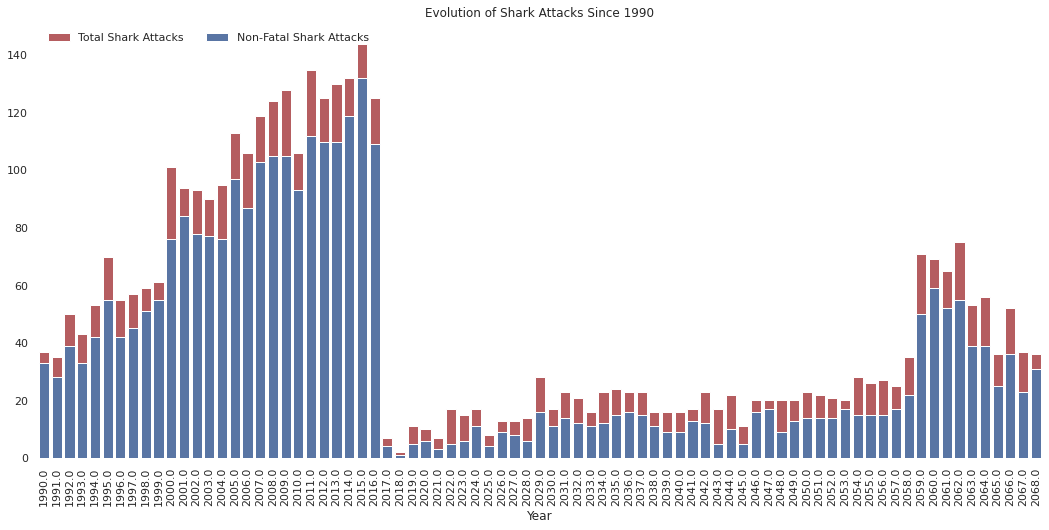

In [113]:
sns.set(style="white")
sns.color_palette("deep")
sns.set_color_codes("deep")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 8))
plt.title("Evolution of Shark Attacks Since 1990")
# Plot the total attack by year
p = sns.countplot(x="Year", data=df[df["Year"] >= 1990], label="Total Shark Attacks", color="r")
g = sns.countplot(x="Year", data=df[(df["Year"] >= 1990) & (df["Fatal"] == "N")], 
                  label="Non-Fatal Shark Attacks", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=False)
p.set_xticklabels(p.get_xticklabels(), rotation=90)
sns.despine(left=True, bottom=True)
ax.set(ylabel="", xlabel="Year")

[Text(0, 0.5, ''), Text(0.5, 0, 'Month')]

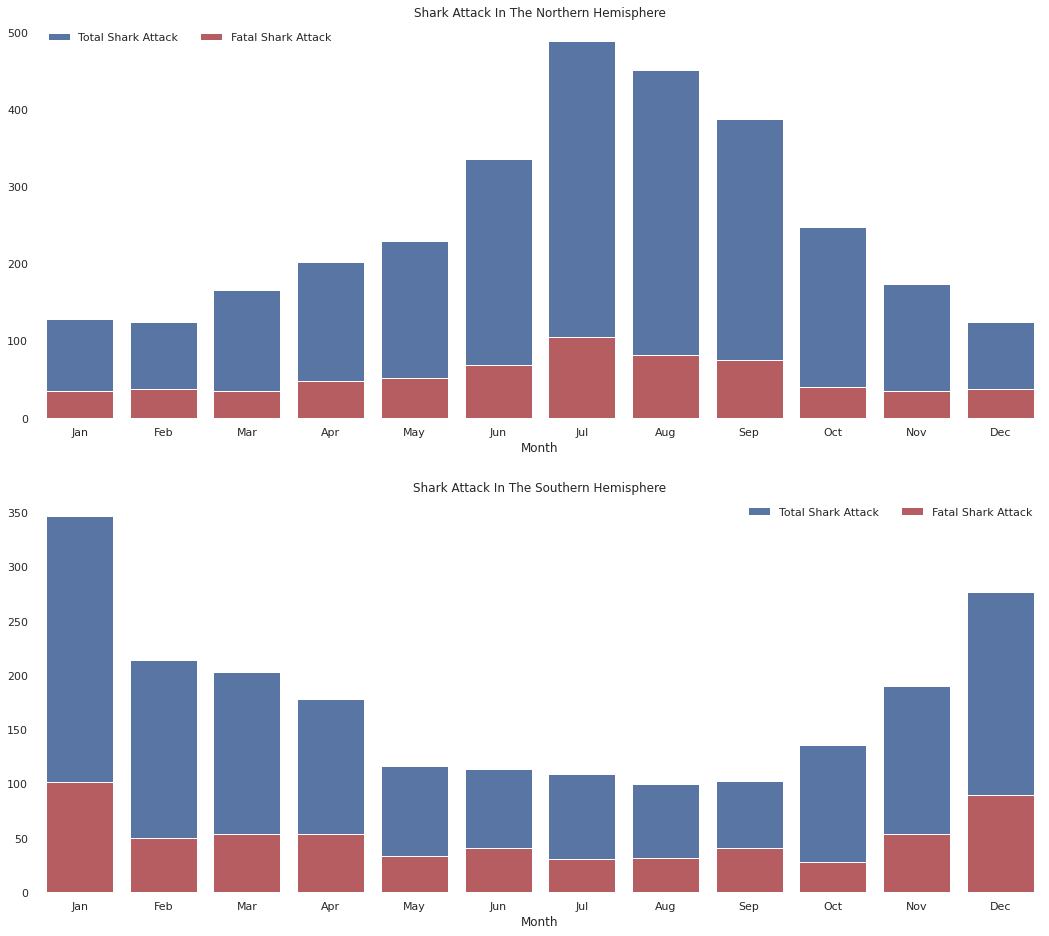

In [109]:
sns.set(style="white")
sns.color_palette("deep")
sns.set_color_codes("deep")

# Initialize the matplotlib figure
fig = plt.figure(figsize=(18, 16))
ax1 = plt.subplot(211)
plt.title("Shark Attack In The Northern Hemisphere")
ax2 = plt.subplot(212)
plt.title("Shark Attack In The Southern Hemisphere")

# Plot the total attack by Month
p = sns.countplot(x="Month", data=df[df["Hemisphere"] == "N"], label="Total Shark Attack", color="b", ax=ax1)
g = sns.countplot(x="Month", data=df[(df["Hemisphere"] == "N") & (df["Fatal"] == "Y")], 
                  label="Fatal Shark Attack", color="r", ax=ax1)

v = sns.countplot(x="Month", data=df[df["Hemisphere"] == "S"], label="Total Shark Attack", color="b", ax=ax2)
d = sns.countplot(x="Month", data=df[(df["Hemisphere"] == "S") & (df["Fatal"] == "Y")], 
                  label="Fatal Shark Attack", color="r", ax=ax2)

m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Add a legend and informative axis label
ax1.legend(ncol=2, loc="upper left", frameon=False)
ax2.legend(ncol=2, loc="upper right", frameon=False)
p.set_xticklabels(m)
v.set_xticklabels(m)
sns.despine(left=True, bottom=True)
ax1.set(ylabel="", xlabel="Month")
ax2.set(ylabel="", xlabel="Month")